In [ ]:
## Code to optimize a curve fit for log(P_c) using b*log(1-exp(x-a))+c, uses least squares

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [13]:
df = pd.read_csv('/homes/fed1/Survival_Franny/formatted_net_SEER_survival_by_cause_age_sex_year.csv')

In [14]:
df['t'] = df['interval']+1

df = df[df.year==0]
df = df[df.sex==3]
df = df[df.age_name=="All Ages"]

df['P_c'] = 1 - df['net_survival']

In [15]:
#with_P_c = df[df.t==1]
for cancer in df.cause_name.unique():
    index_1 = (df.cause_name==cancer)
    df.loc[(index_1)&(df.t>1), 'P_c']=1-df.net_survival[index_1].values[1:]/df.net_survival[index_1].values[:-1]
    #with_P_c = pd.merge(with_P_c, df_cause, how='outer')

In [11]:
df_cause.loc[index_1, 'P_c']

1569780    0.203
1569781    0.265
1569782    0.299
1569783    0.321
1569784    0.338
1569785    0.351
1569786    0.362
1569787    0.372
1569788    0.381
1569789    0.389
1569790    0.397
1569791    0.404
1569792    0.412
1569793    0.418
1569794    0.424
Name: P_c, dtype: float64

In [16]:
df = df.dropna()
df = df[df['P_c']!=0]
df['log_P_c'] = np.log(df['P_c'])

/ihme/homes/fed1/.conda/envs/survival_env/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
# define the functional form to fit
def function(x,t):
    return x[1]*np.log(1 + np.exp(-(t-x[0])))+x[2]

def model(x, t, y):
    return function(x,t)-y

In [18]:
# starting values
x_0 = np.array([1.0,1.0,1.0])

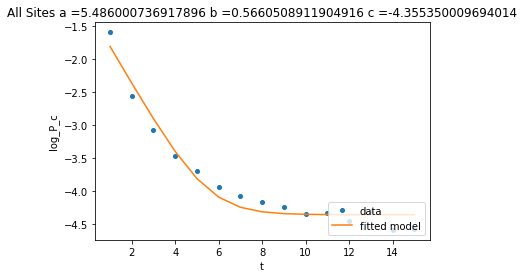

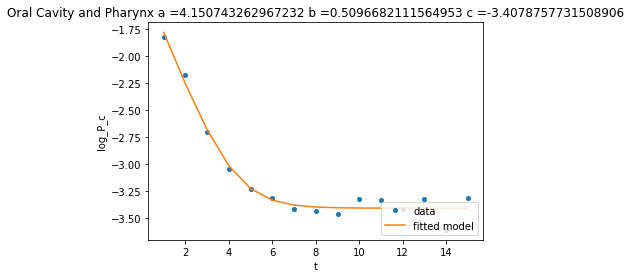

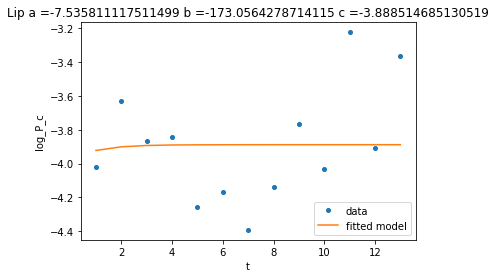

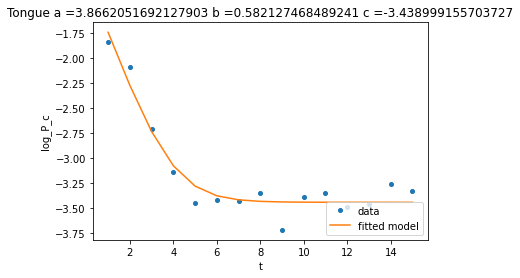

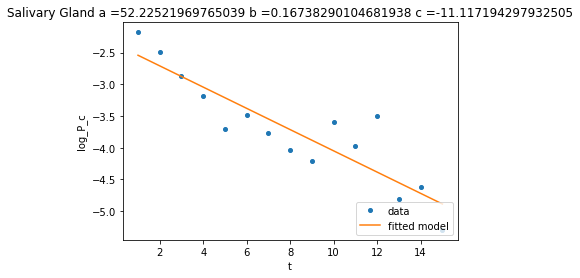

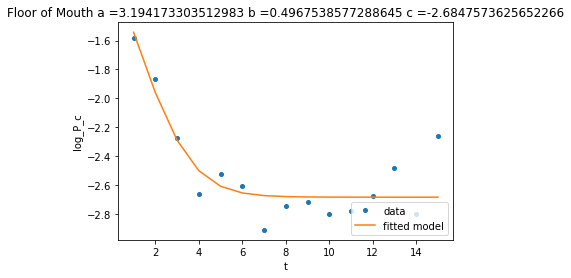

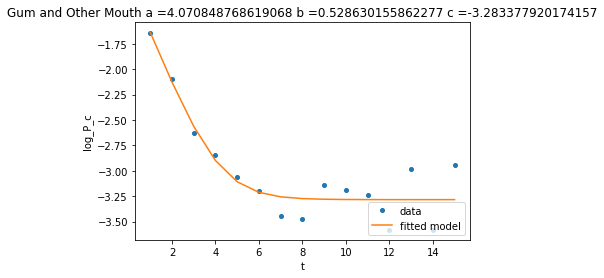

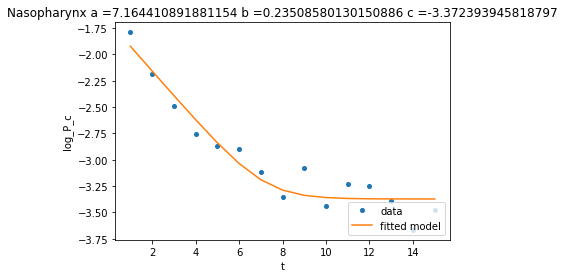

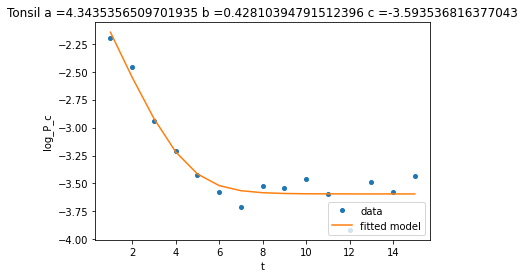

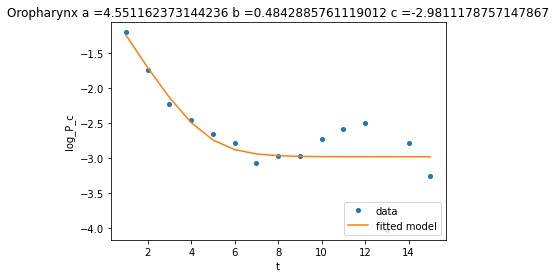

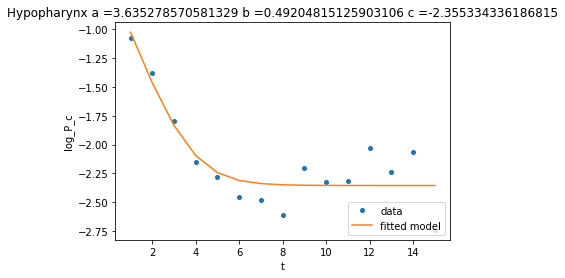

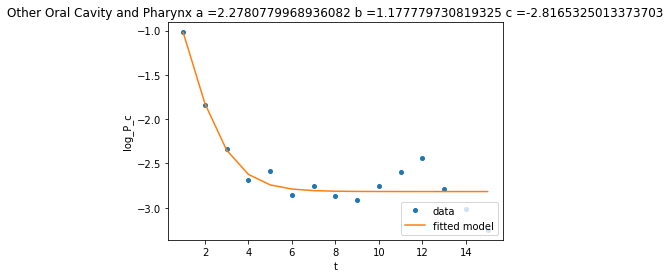

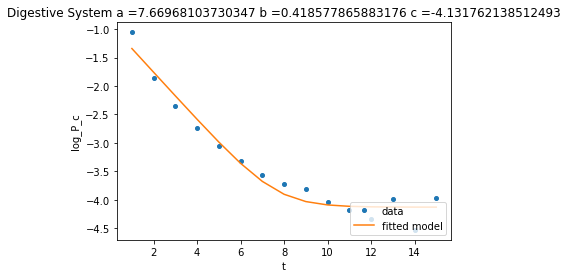

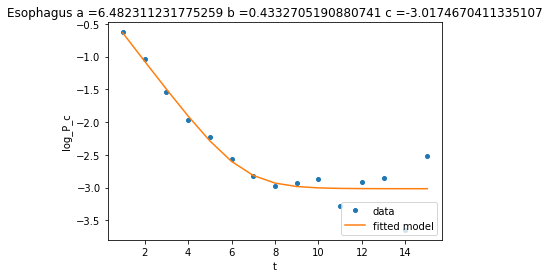

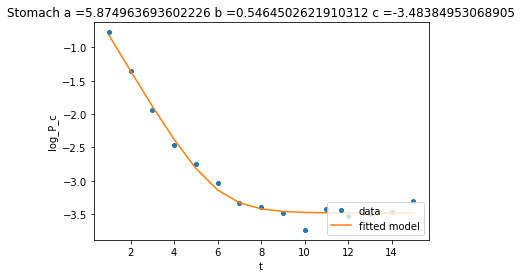

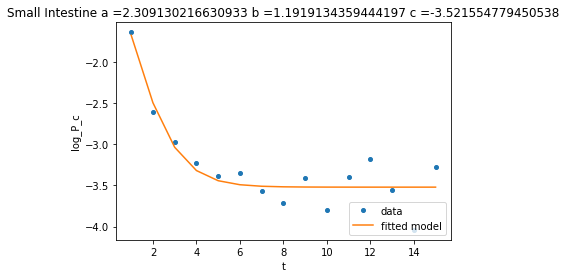

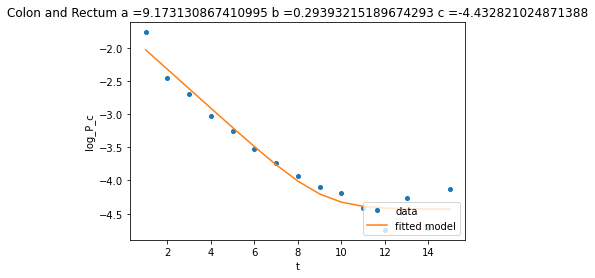

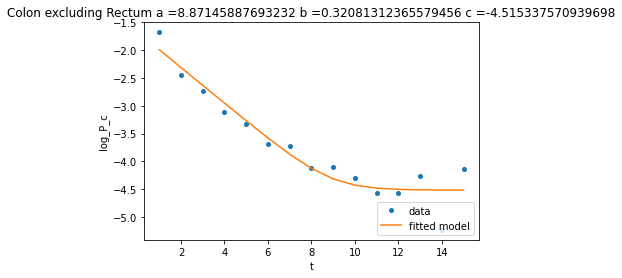

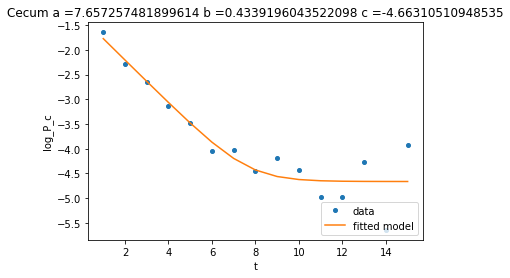

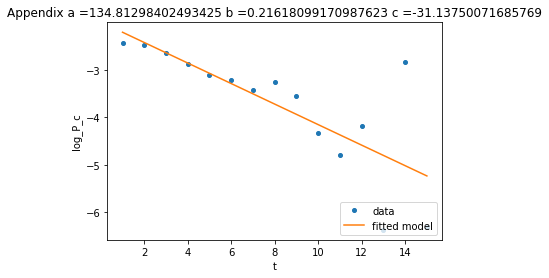

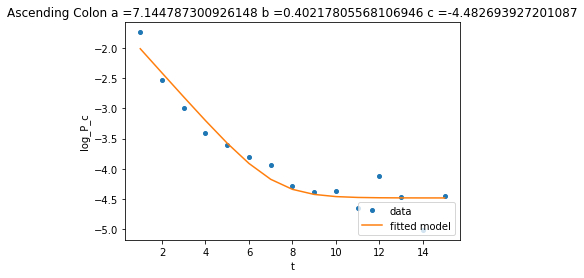

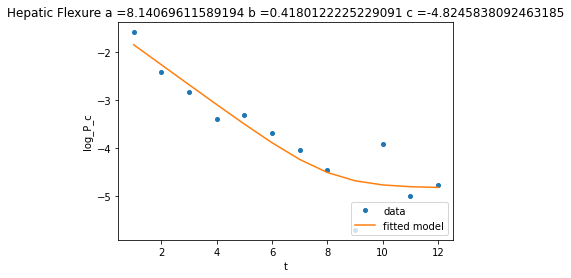

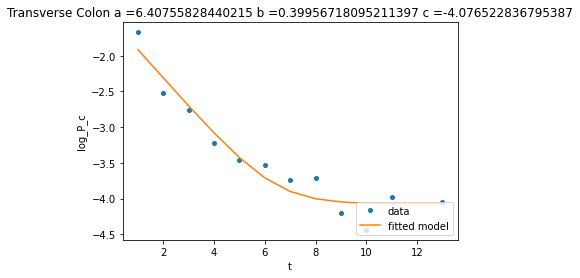

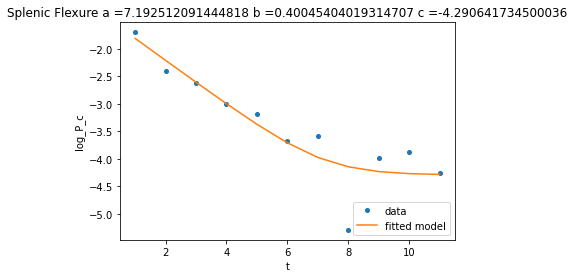

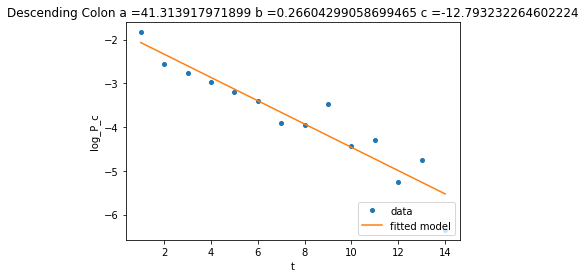

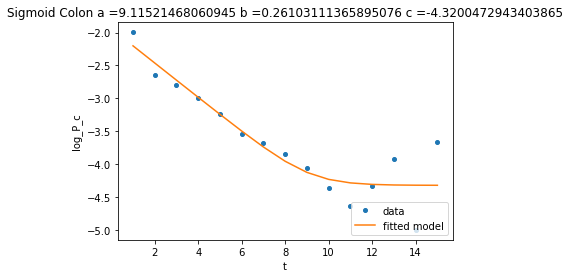

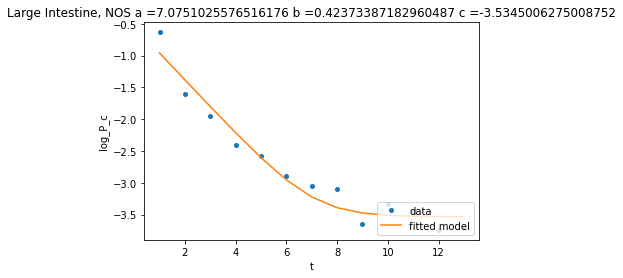

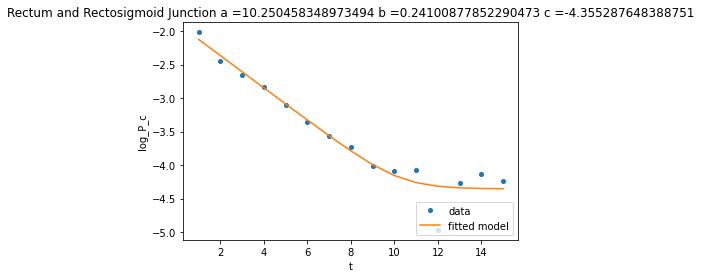

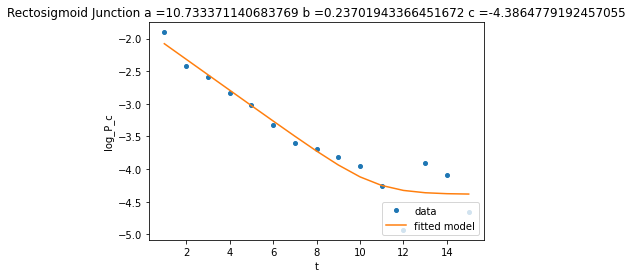

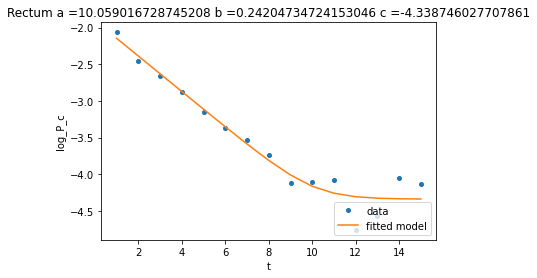

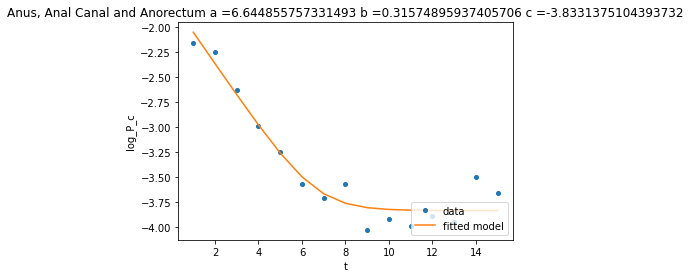

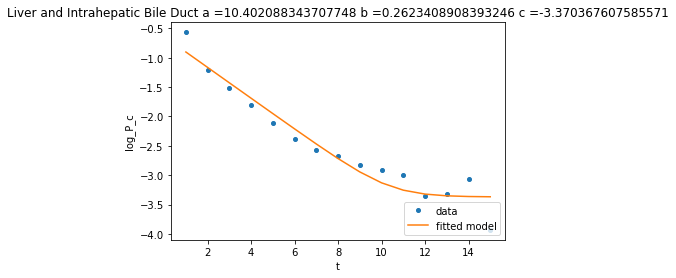

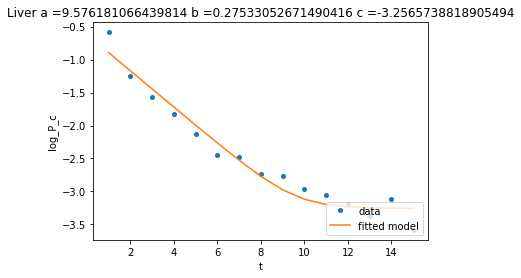

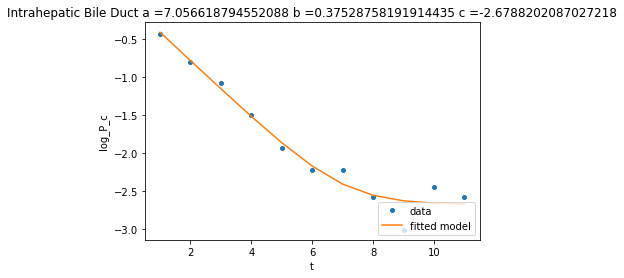

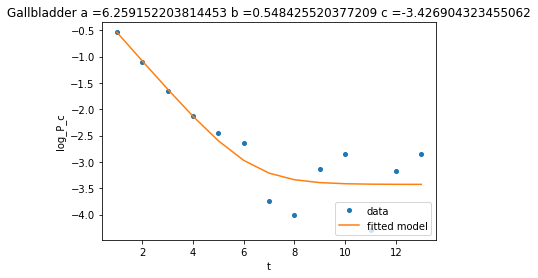

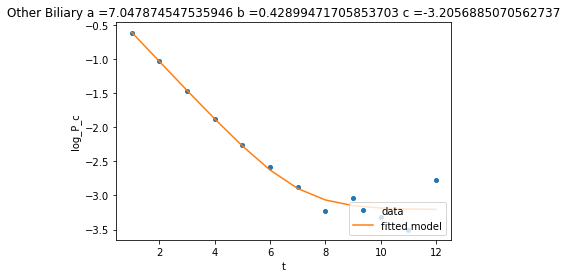

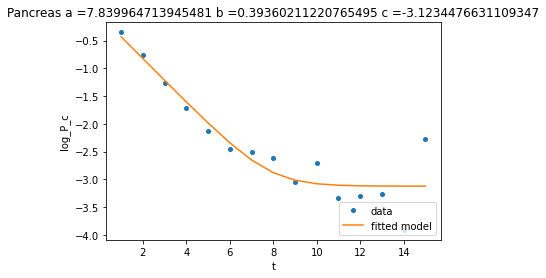

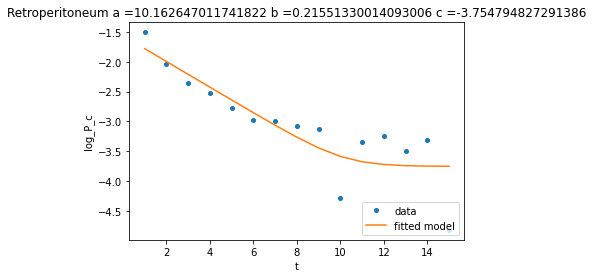

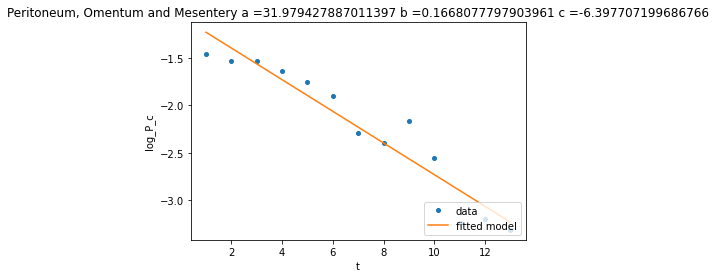

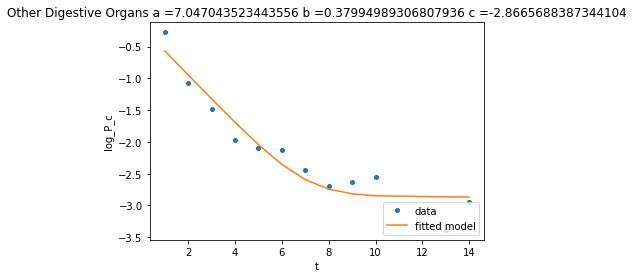

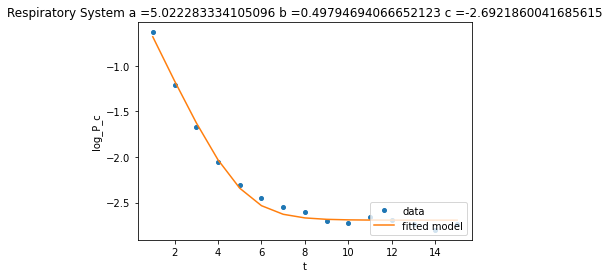

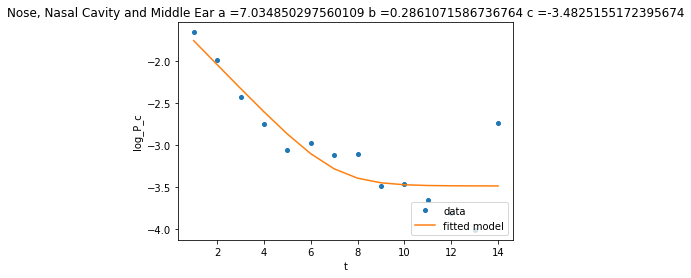

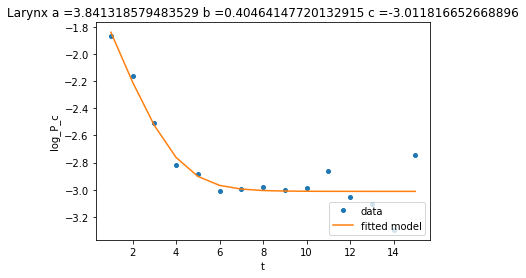

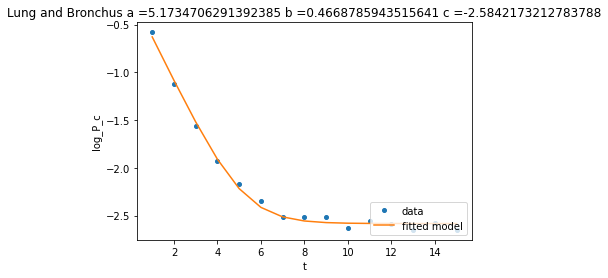

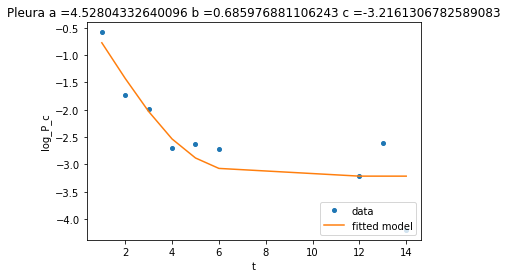

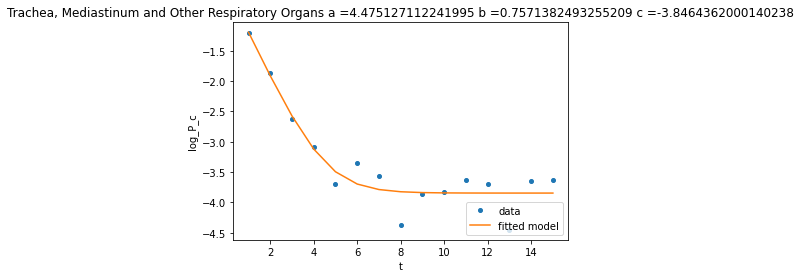

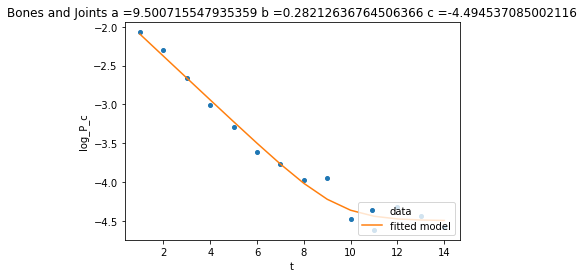

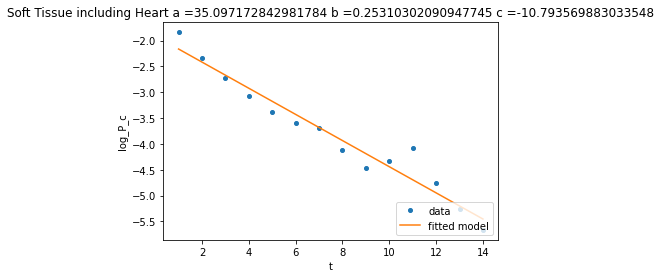

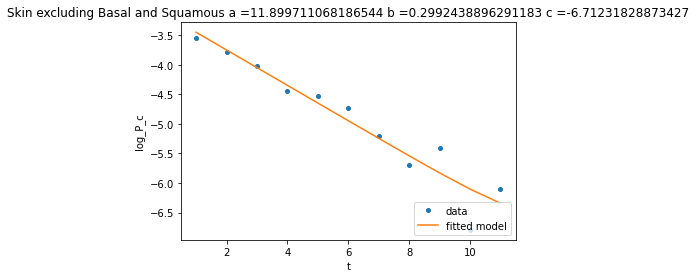

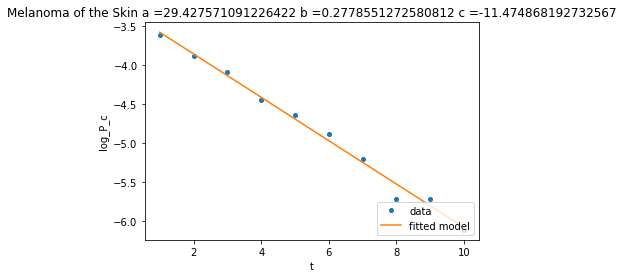

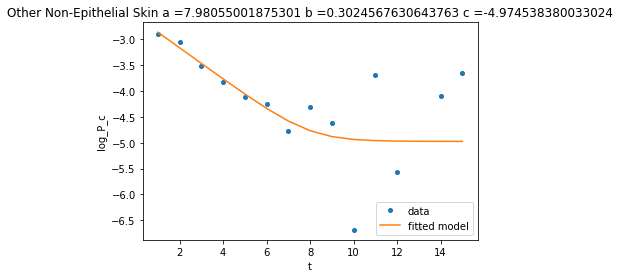

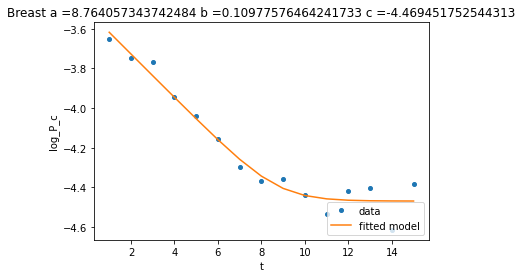

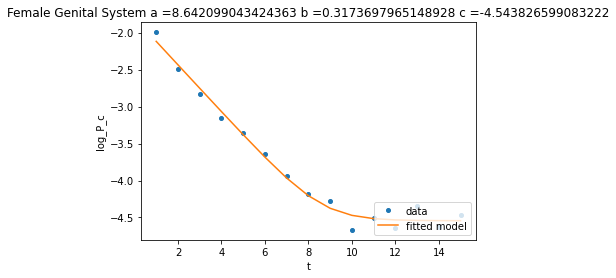

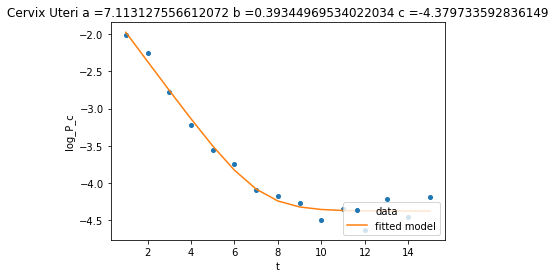

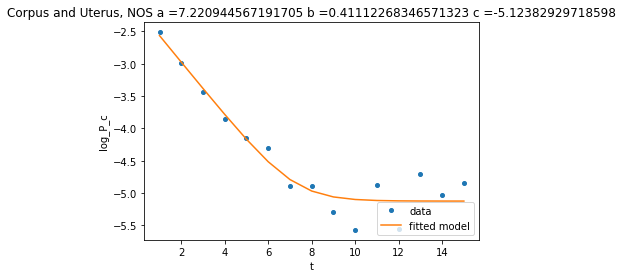

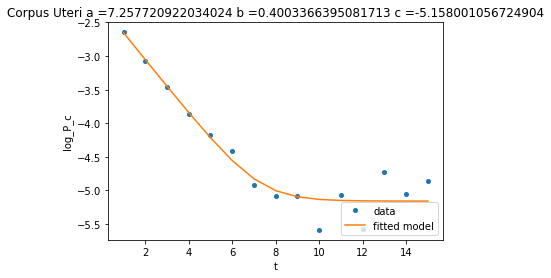

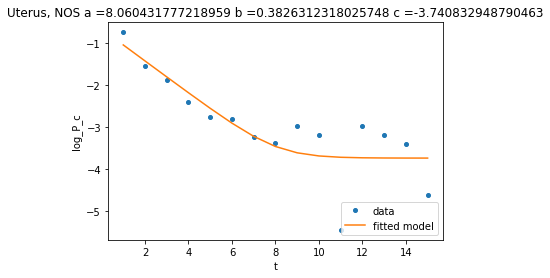

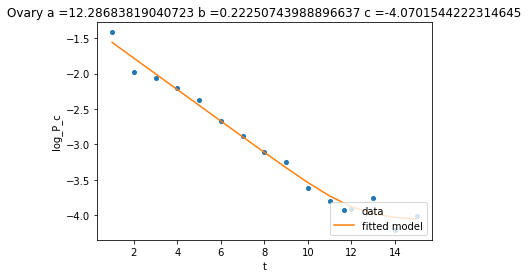

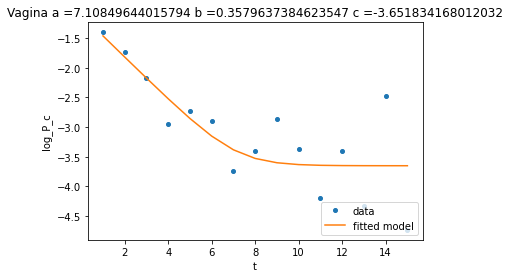

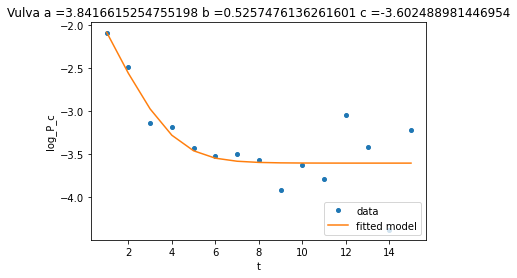

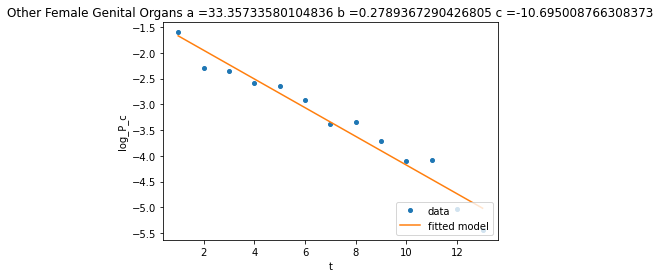

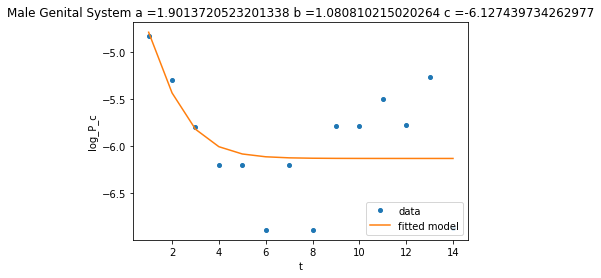

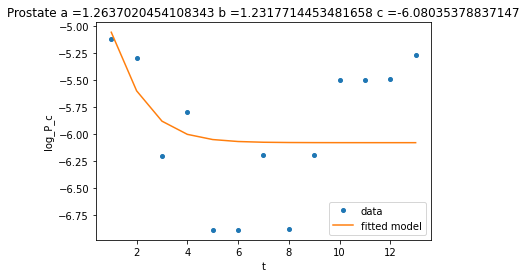

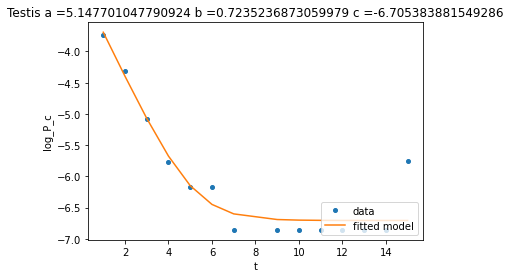

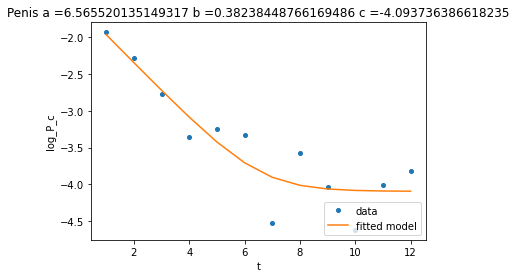

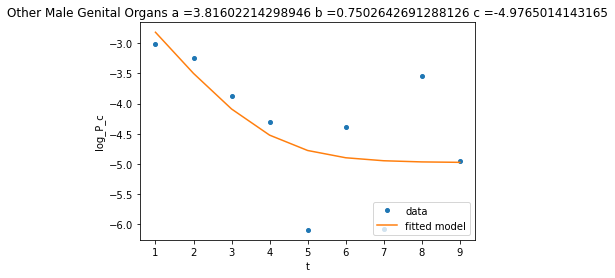

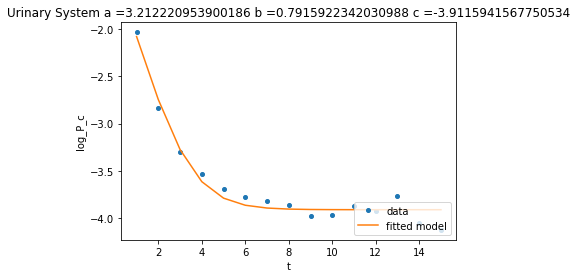

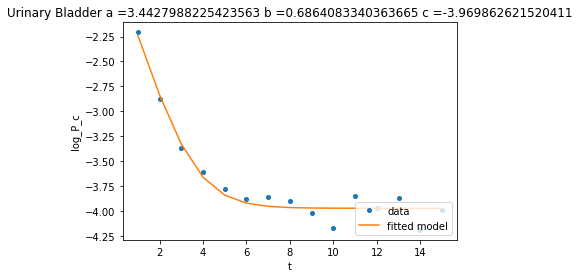

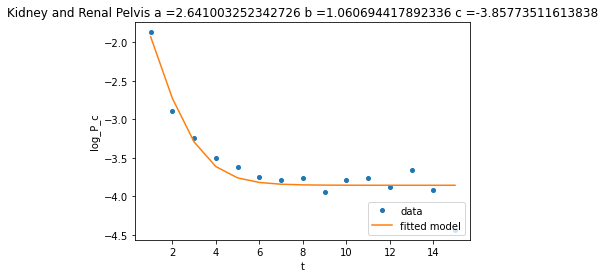

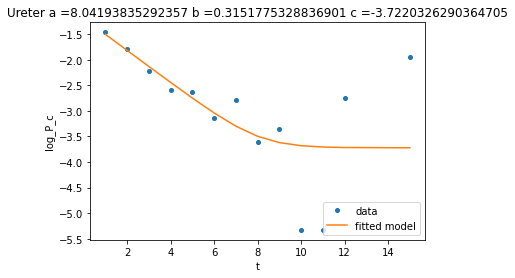

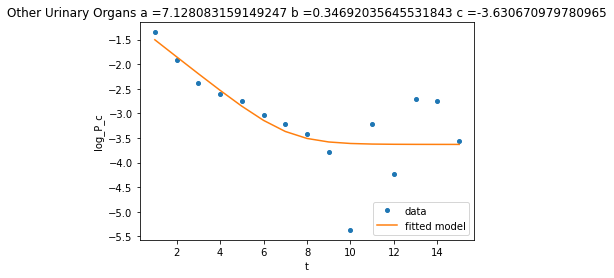

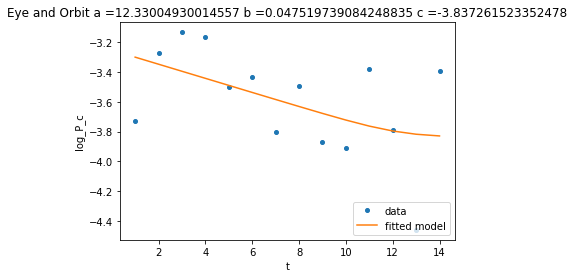

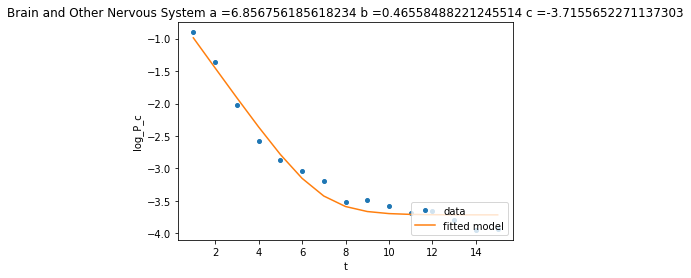

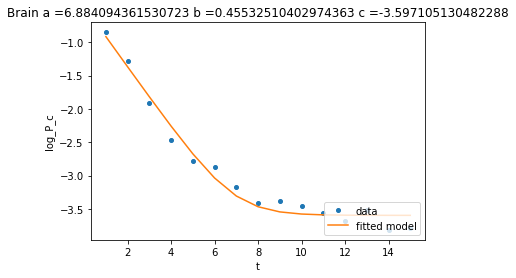

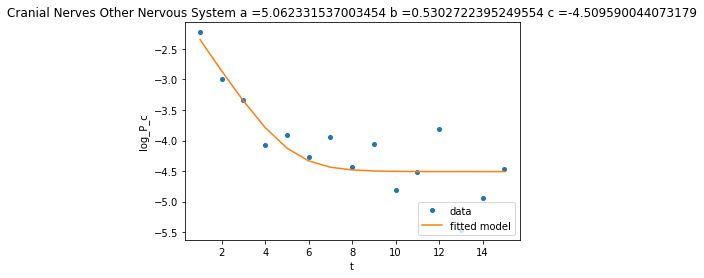

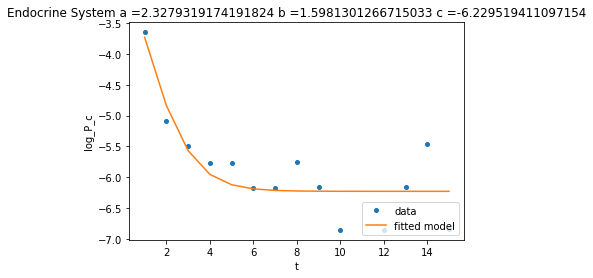

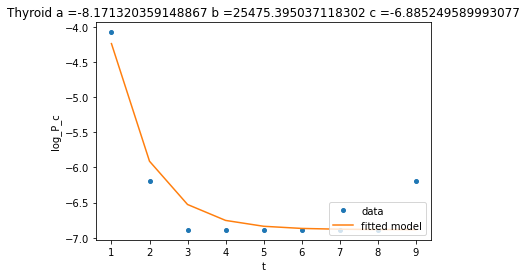

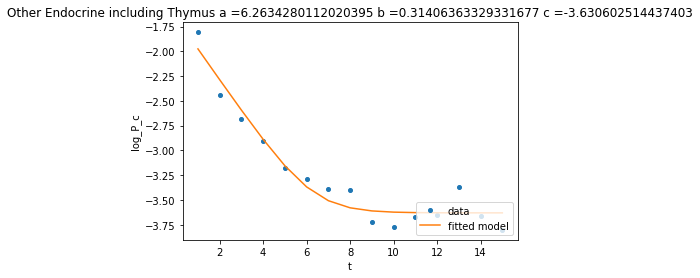

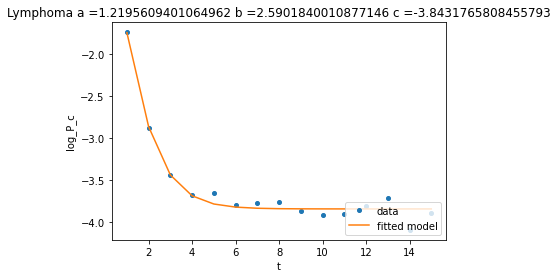

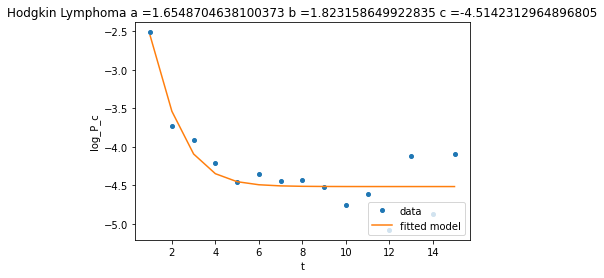

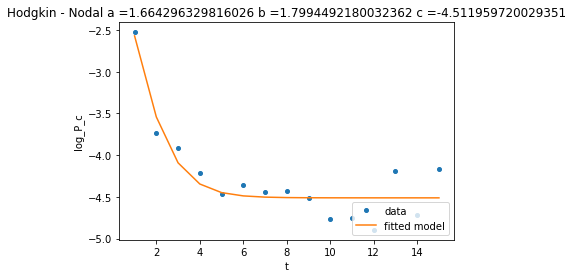

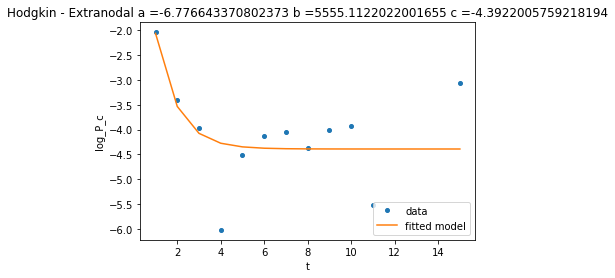

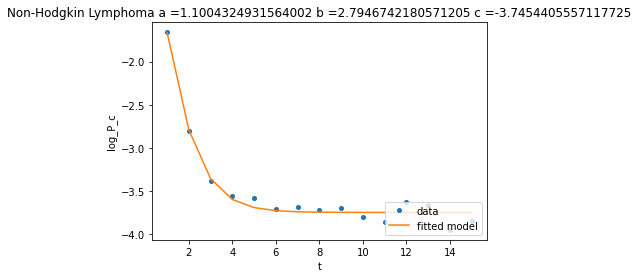

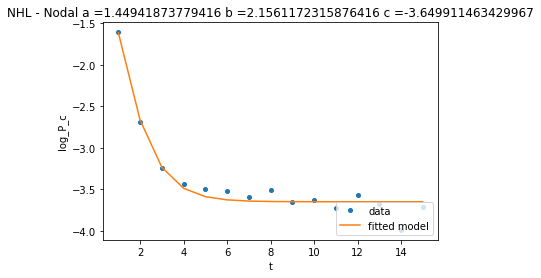

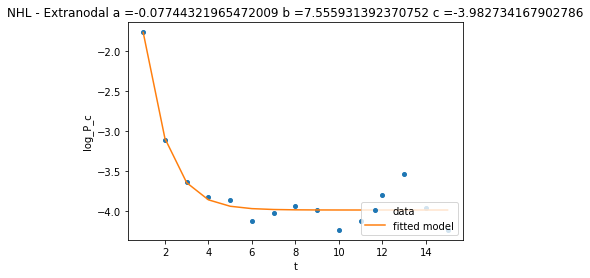

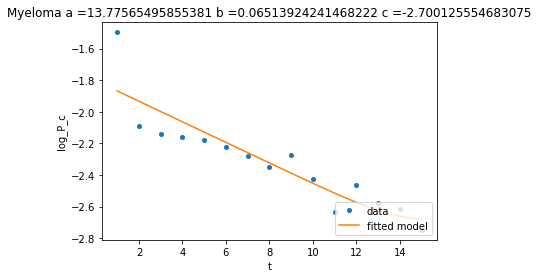

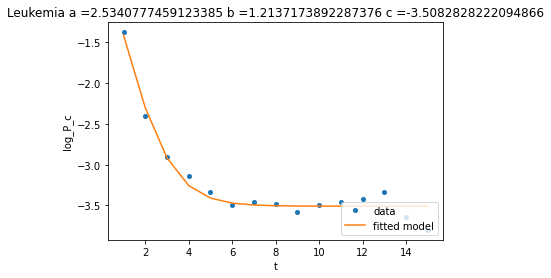

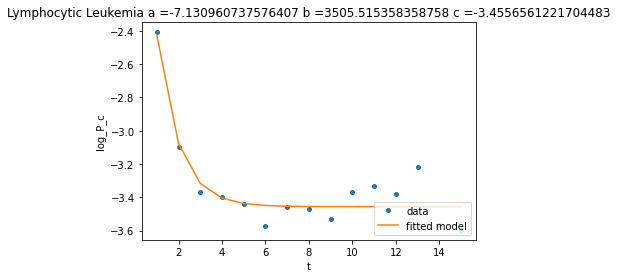

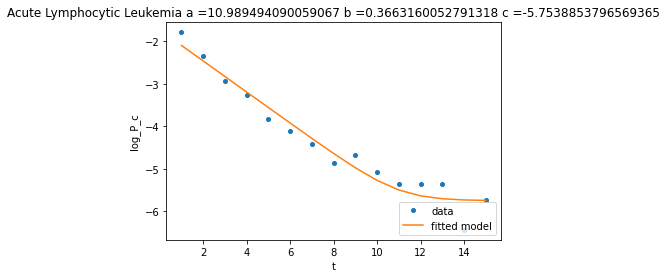

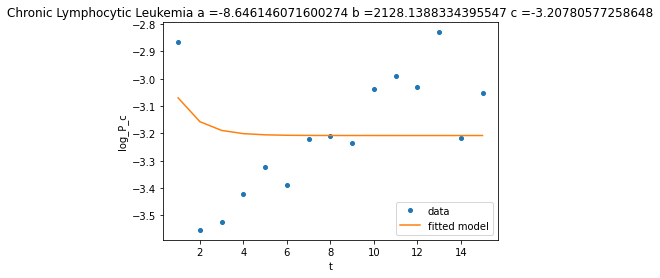

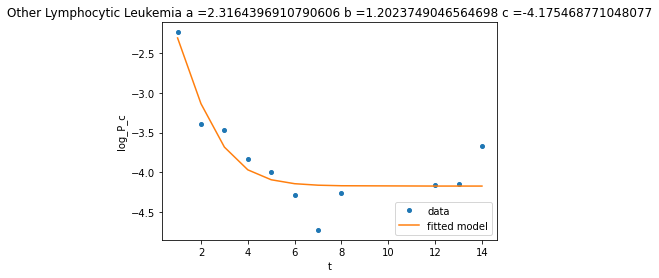

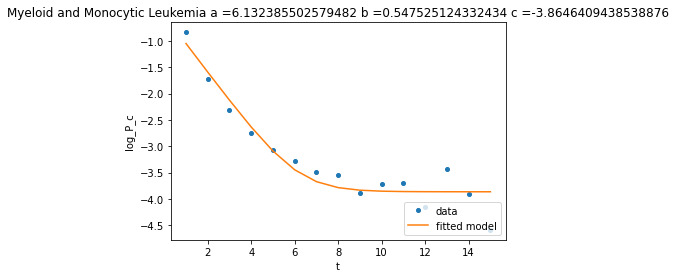

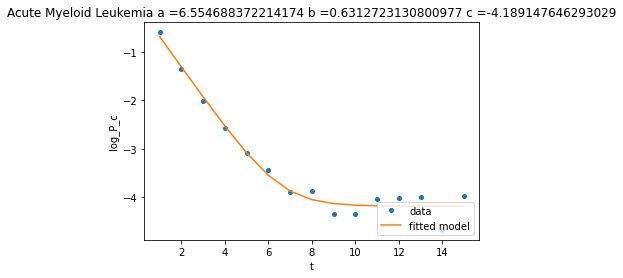

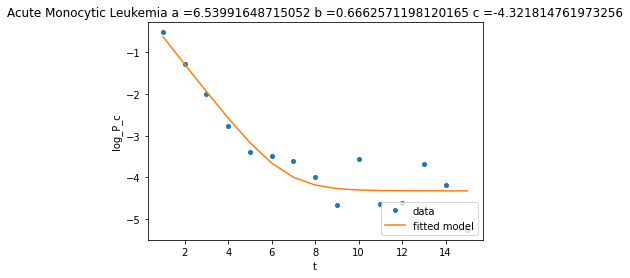

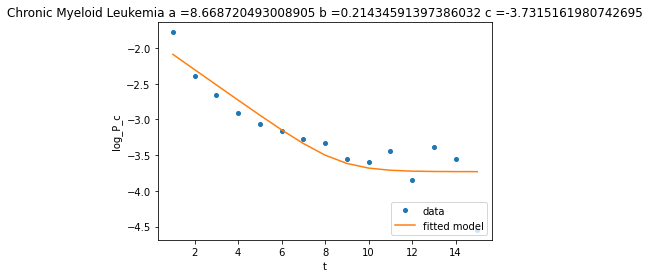

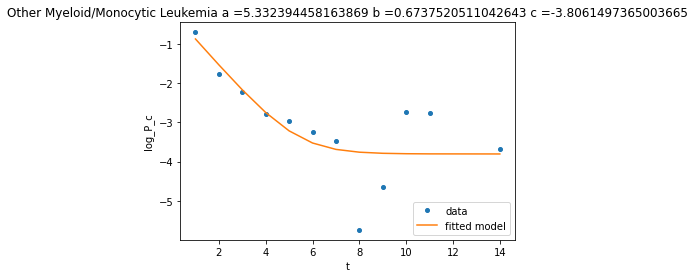

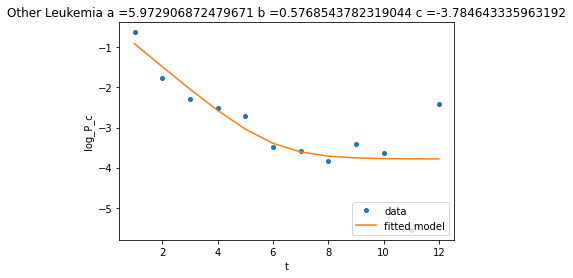

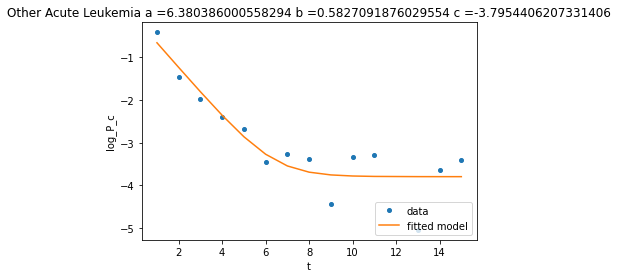

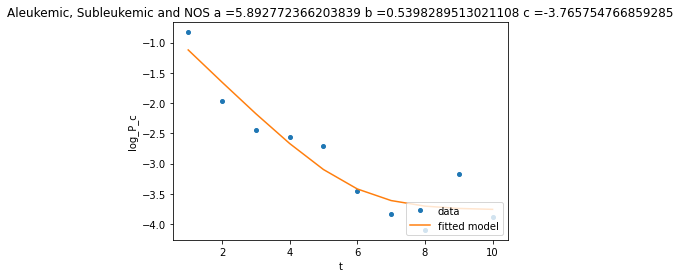

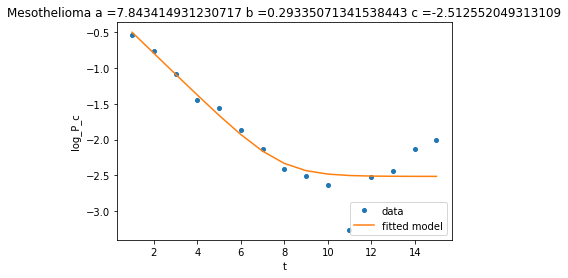

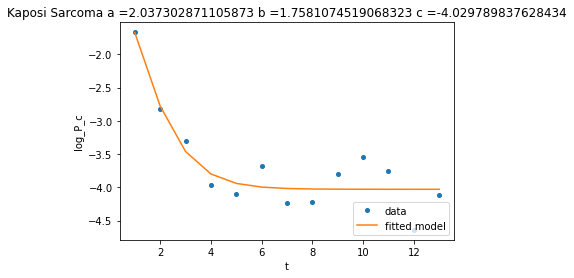

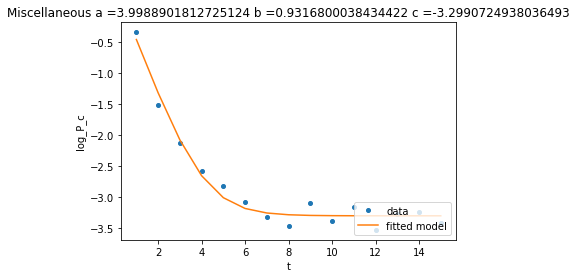

In [27]:
for cancer in df.cause_name.unique():
    #for age in with_P_c_no_inf.age_name.unique():
        #cancer = "All Sites"
        #ages = "All Ages"

        data = df[df['cause_name']==cancer]
        #data = data[data['age_name']==age]


        t=data['t']
        y=data['log_P_c']
        res_lsq = least_squares(model, x_0, args=(t,y), loss='linear')
        # other loss functions to try:
        # soft_l1, cauchy
        #weights

        # PLOT
        output = function(res_lsq.x, t)
        plt.plot(t, y, 'o', markersize=4, label='data')
        plt.plot(t, output, label='fitted model')
        plt.xlabel("t")
        plt.ylabel("log_P_c")
        plt.legend(loc='lower right')
        plt.title(cancer+": a ="+str(res_lsq.x[0])+" b ="+str(res_lsq.x[1])+" c ="+str(res_lsq.x[2]))
        plt.show()

In [25]:
res_lsq.x

array([ 3.99889018,  0.93168   , -3.29907249])

Try age group specific

Record by combination the a, b, c in a data frame that can be used in model

Write code to run a MIR/survival model using this fit for log_P_c